In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

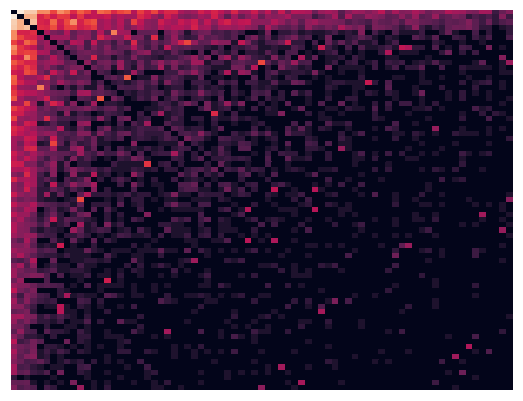

In [2]:
# read in data
df = pd.read_csv('../data/simpsons_script_lines.csv', error_bad_lines=False)\
    .sort_values(['episode_id', 'timestamp_in_ms'])

# get top characters by line count
cts = df.raw_character_text.value_counts()
top = list(cts[:75].index)

# filter top characters
df1 = df[np.where(df.raw_character_text.isin(top), True, False)]

# create new dataframe
d = {'x1' : df1.raw_character_text[:-1].values,
     'x2' : df1.raw_character_text[1:].values}
df2 = pd.DataFrame.from_dict(d)

# filter out characters talking to themselves
df3 = df2[np.where(df2.x1 != df2.x2, True, False)]

# create character by character df
df4 = pd.get_dummies(df3.x2).groupby(df3.x1).apply(sum)
df4.columns = list(df4.index)
df4.index = list(df4.index)

# create ordered df
# order = ['Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson', 'Grampa Simpson',\
#          'Ned Flanders', 'Seymour Skinner', 'C. Montgomery Burns', 'Moe Szyslak', 'Milhouse Van Houten']

order = top

df6 = df4.loc[order,order]

# scale values
df7 = (df6+1)**(1/4096)

# create plot
fig = plt.figure(figsize=(9,7))
# sns.heatmap(df7, annot=False, cbar_kws={'ticks' : [],
#                                         'extend' : 'max'})
sns.heatmap(df7, annot=False, cbar=False)

plt.xticks([])
plt.yticks([])

# plt.xticks(fontsize = 18, rotation='90')
# plt.yticks(fontsize = 18, rotation='0')
# plt.title(f'The Simpsons: Who speaks to whom?',
#           fontdict={'fontsize': 24},
#           pad=24)
# plt.xlabel(f'\n*Note: rows speak to columns', fontsize=22)
plt.savefig('../plots/heatmap_large.png', bbox_inches='tight')
plt.show()

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

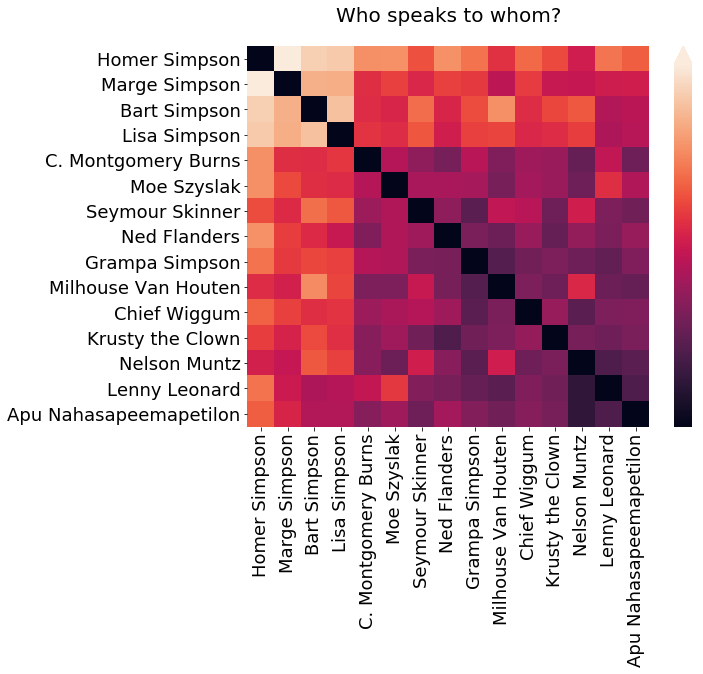

In [3]:
# read in data
df = pd.read_csv('../data/simpsons_script_lines.csv', error_bad_lines=False)\
    .sort_values(['episode_id', 'timestamp_in_ms'])

# get top characters by line count
cts = df.raw_character_text.value_counts()
top = list(cts[:15].index)

# filter top characters
df1 = df[np.where(df.raw_character_text.isin(top), True, False)]

# create new dataframe
d = {'x1' : df1.raw_character_text[:-1].values,
     'x2' : df1.raw_character_text[1:].values}
df2 = pd.DataFrame.from_dict(d)

# filter out characters talking to themselves
df3 = df2[np.where(df2.x1 != df2.x2, True, False)]

# create character by character df
df4 = pd.get_dummies(df3.x2).groupby(df3.x1).apply(sum)
df4.columns = list(df4.index)
df4.index = list(df4.index)

# create ordered df
# order = ['Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson', 'Grampa Simpson',\
#          'Ned Flanders', 'Seymour Skinner', 'C. Montgomery Burns', 'Moe Szyslak', 'Milhouse Van Houten']

order = top

df6 = df4.loc[order,order]

# scale values
df7 = np.log(df6+1)

# create plot
fig = plt.figure(figsize=(9,7))
sns.heatmap(df7, annot=False, cbar_kws={'ticks' : [],
                                        'extend' : 'max'})
plt.xticks(fontsize = 18, rotation='90')
plt.yticks(fontsize = 18, rotation='0')
plt.title(f'Who speaks to whom?',
          fontdict={'fontsize': 20},
          pad=24)
# plt.xlabel(f'\n*Note: rows speak to columns', fontsize=22)
plt.savefig('../plots/heatmap_small.png', bbox_inches='tight')
plt.show()

In [4]:
# read in data
df1 = pd.read_csv('../data/simpsons_script_lines.csv', error_bad_lines=False)

df2 = pd.read_csv('../data/simpsons_episodes.csv', error_bad_lines=False)[['id', 'season']]
df2.columns = ['episode_id', 'season']

df3 = pd.merge(df1, df2, how='left', on='episode_id')

print(df3.shape)
df3.head()

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

(158248, 14)


,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,season
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,2
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0,2
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0,2
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0,2
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0,2


In [5]:
# get top characters by line count
cts = df.raw_character_text.value_counts()
top = list(cts[:31].index)

str(top)

"['Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson', 'C. Montgomery Burns', 'Moe Szyslak', 'Seymour Skinner', 'Ned Flanders', 'Grampa Simpson', 'Milhouse Van Houten', 'Chief Wiggum', 'Krusty the Clown', 'Nelson Muntz', 'Lenny Leonard', 'Apu Nahasapeemapetilon', 'Waylon Smithers', 'Kent Brockman', 'Carl Carlson', 'Edna Krabappel-Flanders', 'Dr. Julius Hibbert', 'Selma Bouvier', 'Barney Gumble', 'Sideshow Bob', 'Rev. Timothy Lovejoy', 'Crowd', 'Groundskeeper Willie', 'Gary Chalmers', 'Ralph Wiggum', 'Mayor Joe Quimby', 'Comic Book Guy', 'Patty Bouvier']"

In [6]:
analyser = SentimentIntensityAnalyzer()


def sentiment_analyzer_scores_pos(sentence):
    score = analyser.polarity_scores(sentence)
    return score['pos']


def sentiment_analyzer_scores_neg(sentence):
    score = analyser.polarity_scores(sentence)
    return score['neg']

In [7]:
sp = []
sn = []
for char in top:   
    df_ = df[np.where(df.raw_character_text==char, True, False)]
    sent_pos, sent_neg = [], []
    for i in range(df_.shape[0]):
        try:
            sent_pos.append(sentiment_analyzer_scores_pos(df_.normalized_text.values[i]))
            sent_neg.append(sentiment_analyzer_scores_neg(df_.normalized_text.values[i]))
        except:
            pass
    sp.append(np.mean(sent_pos))
    sn.append(np.mean(sent_neg))
    
d = {'character' : top, 'pos' : sp, 'neg' : sn}
sent_df = pd.DataFrame.from_dict(d)

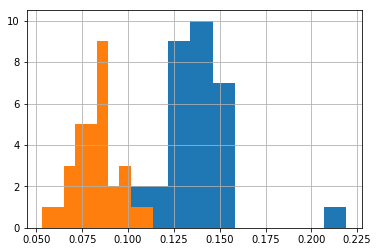

In [8]:
sent_df.pos.hist()
sent_df.neg.hist()
plt.show()

In [9]:
sent_df_old = sent_df.copy()

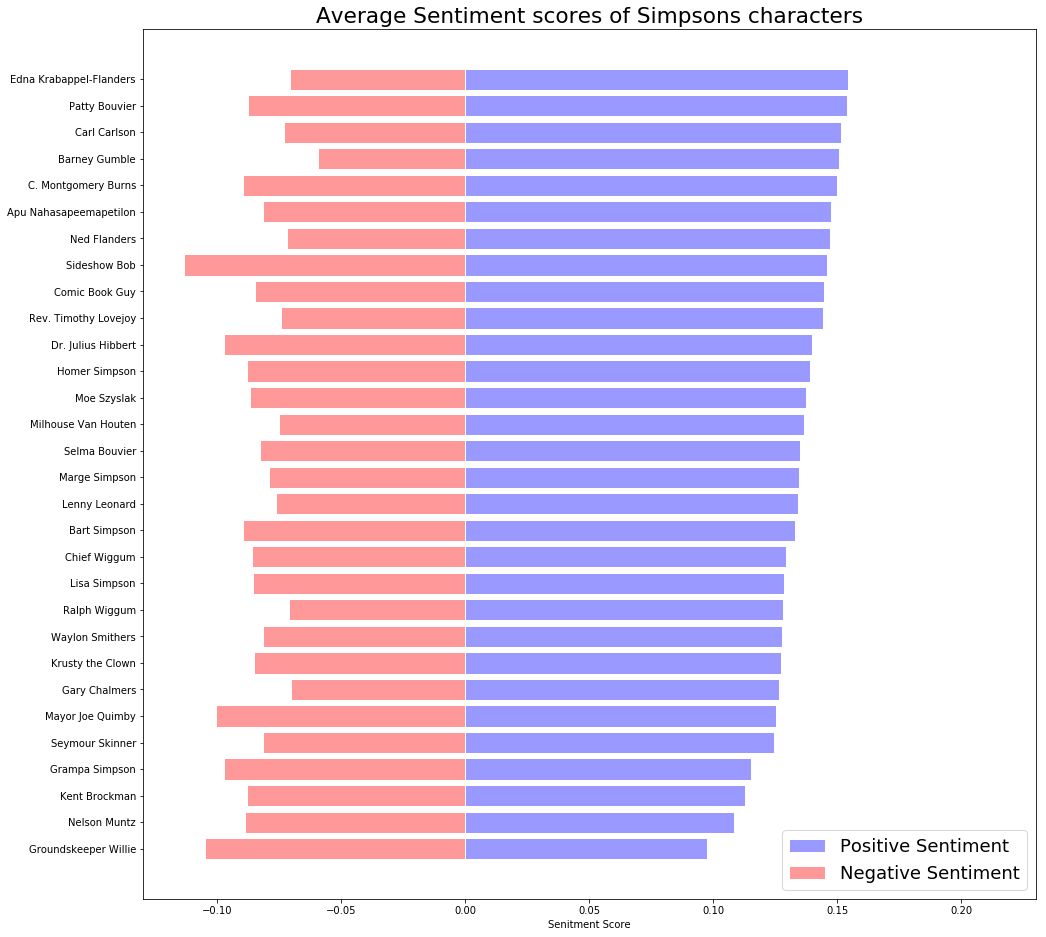

In [10]:
sent_df = sent_df_old.sort_values('pos', ascending=True)
sent_df = sent_df.iloc[:-1,:]

n = len(sent_df.pos)
X = np.arange(n)

fig = plt.figure(figsize=(16,16))
plt.barh(X, sent_df.pos, facecolor='#9999ff', edgecolor='white')
plt.barh(X, -sent_df.neg, facecolor='#ff9999', edgecolor='white')

font = {'size'   : 18}
import matplotlib
matplotlib.rc('font', **font)

plt.xlim([-.13,.23])
plt.yticks(ticks=X, labels=sent_df.character, rotation='0')
plt.xlabel('Senitment Score')
plt.title('Average Sentiment scores of Simpsons characters')
plt.legend(('Positive Sentiment','Negative Sentiment'))
plt.savefig('../plots/sentiment_plot_1.png', bbox_inches='tight')
plt.show()